# Twitch Stream Engagement Visualization Based on Comment Frequency

## Data Preparation

In [26]:
import pandas as pd

In [27]:
streamer_id = 'giantwaffle'
stream_id = '257297169'

In [28]:
df = pd.read_pickle('data/ICWSM19_data/' + streamer_id + '.pkl')

In [29]:
filt = (df['video_id'] == stream_id)

In [30]:
df_filtered = df[filt].copy()

In [31]:
df_filtered.head()

,body,channel_id,commenter_id,commenter_type,created_at,fragments,offset,updated_at,video_id
48542,Kappa,22552479,29165560,user,2018-05-03T17:31:41.761Z,[{'emoticon_id': '25'}],13.961,2018-05-03T17:31:41.761Z,257297169
48543,LIVU POGGERS,22552479,56297061,user,2018-05-03T17:32:05.378Z,[{'text': 'LIVU POGGERS'}],37.578,2018-05-03T17:32:05.378Z,257297169
48544,i can see you,22552479,122620487,user,2018-05-03T17:32:07.362Z,[{'text': 'i can see you'}],39.562,2018-05-03T17:32:07.362Z,257297169
48545,POGGERS,22552479,62682434,user,2018-05-03T17:32:47.258Z,[{'text': 'POGGERS'}],79.458,2018-05-03T17:32:47.258Z,257297169
48546,First,22552479,62682434,user,2018-05-03T17:32:48.779Z,[{'text': 'First'}],80.979,2018-05-03T17:32:48.779Z,257297169


In [32]:
df_filtered['created_at'] = df_filtered['created_at'].apply(pd.to_datetime)

In [33]:
df_filtered.dtypes

body                           object
channel_id                     object
commenter_id                   object
commenter_type                 object
created_at        datetime64[ns, UTC]
fragments                      object
offset                        float64
updated_at                     object
video_id                       object
dtype: object

In [120]:
df_grouped = df_filtered.groupby(pd.Grouper(key='created_at', freq='60S')).size().to_frame(name='comment_freq')

In [121]:
df_grouped.head()

,comment_freq
created_at,
2018-05-03 17:31:00+00:00,1
2018-05-03 17:32:00+00:00,5
2018-05-03 17:33:00+00:00,15
2018-05-03 17:34:00+00:00,12
2018-05-03 17:35:00+00:00,21


In [122]:
df_grouped['creation_time'] = pd.to_timedelta((df_grouped.index - df_grouped.index.min()))

In [123]:
df_grouped['creation_time'] = df_grouped['creation_time'].astype(str).map(lambda x: x[7:])

In [124]:
df_grouped['offset_time'] = pd.to_timedelta((df_grouped.index - df_grouped.index.min())).total_seconds()

In [125]:
df_grouped.head()

,comment_freq,creation_time,offset_time
created_at,,,
2018-05-03 17:31:00+00:00,1,00:00:00,0.0
2018-05-03 17:32:00+00:00,5,00:01:00,60.0
2018-05-03 17:33:00+00:00,15,00:02:00,120.0
2018-05-03 17:34:00+00:00,12,00:03:00,180.0
2018-05-03 17:35:00+00:00,21,00:04:00,240.0


In [126]:
def format_link(str_value):
    lst = str_value.split(':', 3)
    return 'https://www.twitch.tv/videos/' + stream_id + '?t=' + lst[0] + 'h' + lst[1] + 'm' + lst[2] + 's'

In [127]:
df_grouped['video_link'] = df_grouped['creation_time'].map(format_link)

In [128]:
df_grouped.head()

,comment_freq,creation_time,offset_time,video_link
created_at,,,,
2018-05-03 17:31:00+00:00,1,00:00:00,0.0,https://www.twitch.tv/videos/257297169?t=00h00...
2018-05-03 17:32:00+00:00,5,00:01:00,60.0,https://www.twitch.tv/videos/257297169?t=00h01...
2018-05-03 17:33:00+00:00,15,00:02:00,120.0,https://www.twitch.tv/videos/257297169?t=00h02...
2018-05-03 17:34:00+00:00,12,00:03:00,180.0,https://www.twitch.tv/videos/257297169?t=00h03...
2018-05-03 17:35:00+00:00,21,00:04:00,240.0,https://www.twitch.tv/videos/257297169?t=00h04...


## Data Visualization

In [129]:
import matplotlib.pyplot as plt
import numpy as np
import mplcursors
import mpld3
plt.style.use('default')
%matplotlib widget

In [155]:
title = 'Twitch Stream Engagement Visualization Based on Number of Comments per Minute'
x_name = 'Comment Creation Time (s)'
y_name = 'Number of Comments'
x = df_grouped['offset_time']
y = df_grouped['comment_freq']
tt = df_grouped['video_link'].values

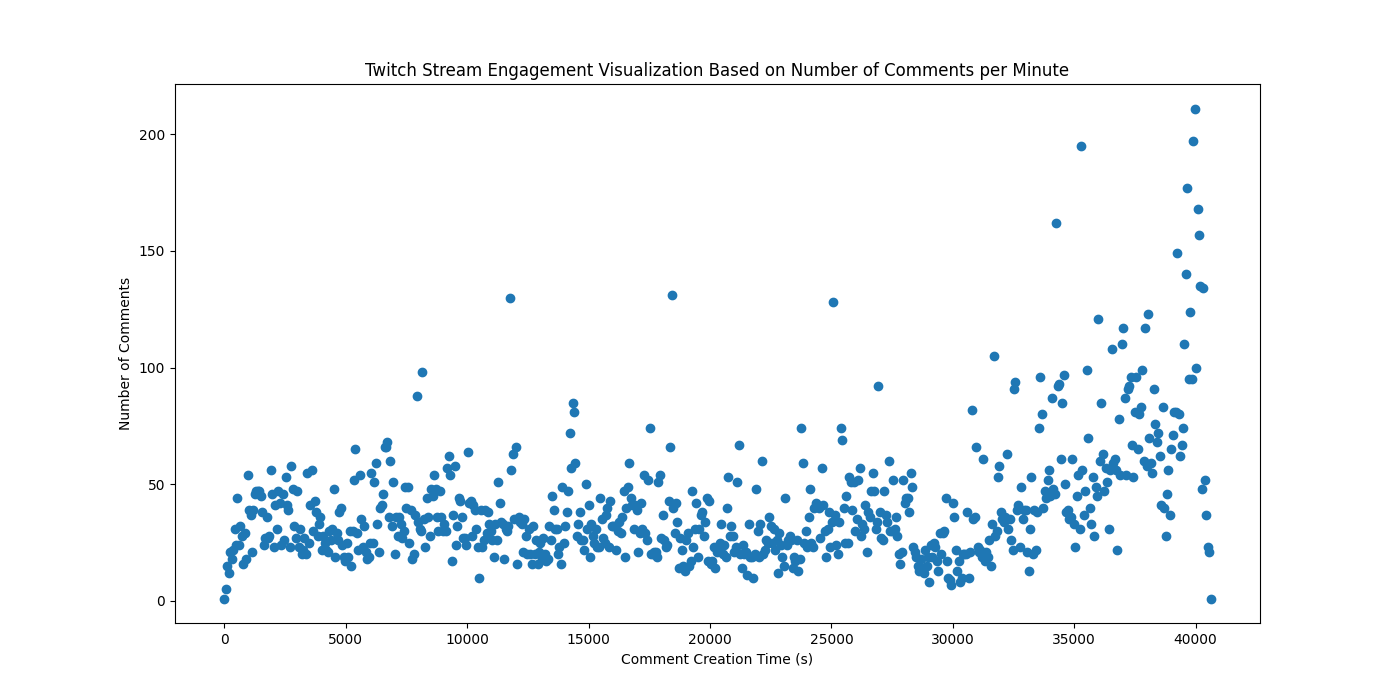

In [156]:
fig, ax = plt.subplots(figsize=(14,7))
ax.set_title(title)
sc = ax.scatter(x,y)

cursor = mplcursors.cursor(sc, hover=False)

@cursor.connect('add')
def on_add(sel):
    sel.annotation.set(text=tt[sel.target.index])

plt.xlabel(x_name)
plt.ylabel(y_name)
plt.show()

In [159]:
df_grouped.sort_values(by=['comment_freq'], ascending=False).head()

,comment_freq,creation_time,offset_time,video_link
created_at,,,,
2018-05-04 04:37:00+00:00,211,11:06:00,39960.0,https://www.twitch.tv/videos/257297169?t=11h06...
2018-05-04 04:36:00+00:00,197,11:05:00,39900.0,https://www.twitch.tv/videos/257297169?t=11h05...
2018-05-04 03:19:00+00:00,195,09:48:00,35280.0,https://www.twitch.tv/videos/257297169?t=09h48...
2018-05-04 04:32:00+00:00,177,11:01:00,39660.0,https://www.twitch.tv/videos/257297169?t=11h01...
2018-05-04 04:39:00+00:00,168,11:08:00,40080.0,https://www.twitch.tv/videos/257297169?t=11h08...


In [168]:
df_grouped.loc['2018-05-04 04:37:00+00:00']['video_link']

'https://www.twitch.tv/videos/257297169?t=11h06m00s'